(381, 13)

(381,)

(164,)

ValueError: Found input variables with inconsistent numbers of samples: [381, 164]

Model Score (R² on test set): 0.6463350878895877


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("Housing.csv")

In [36]:
df.fillna(df.mean(numeric_only=True),inplace=True)

In [38]:
for col in df.select_dtypes(include=['object']).columns:
    df[col]=df[col].fillna(df[col].mode()[0])

In [40]:
df_encoded=pd.get_dummies(df,drop_first=True).astype(int)

In [42]:
x=df_encoded.drop(columns=['price'])
y=df_encoded['price']
          

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [46]:
y_test.shape

(164,)

In [48]:

from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [50]:
y_pred=model.predict(x_test)
y_pred

array([5372312.61614641, 7069241.00525806, 3099290.78784024,
       4526446.61703974, 3281573.61192656, 3589455.18752547,
       5728625.30074516, 6422877.52476236, 2797870.49568591,
       2554357.99210551, 9693560.19894657, 2802903.76131031,
       3026465.95300837, 3433891.33202092, 3792786.34565513,
       5321204.36478554, 2999852.37322993, 4813306.52790376,
       4572077.61633938, 3595733.80237382, 5605701.03333098,
       5838934.41614982, 2730716.89440109, 4837741.37096246,
       5638460.49223857, 7809681.30410655, 3347443.37529207,
       5328750.6625753 , 8323072.83237389, 3374792.28854334,
       6379706.15324898, 3397999.89564252, 6709115.8233402 ,
       4249666.18392567, 3594972.20315591, 5842994.13027721,
       5115480.11172668, 4359421.90319848, 3046570.15372424,
       4597379.56416964, 4784358.1758961 , 3411743.78220679,
       7048978.02507302, 4062741.36892573, 3785699.24160861,
       4286017.77250844, 6729020.2073964 , 4133428.23821411,
       3845434.09183083,

In [52]:
error=y_test-y_pred
error

316   -1.312313e+06
77    -4.192410e+05
360    6.107092e+05
90     1.913553e+06
493   -4.815736e+05
           ...     
395   -2.622572e+05
425   -7.332088e+05
195   -2.120389e+06
452   -2.309979e+06
154    3.103569e+05
Name: price, Length: 164, dtype: float64

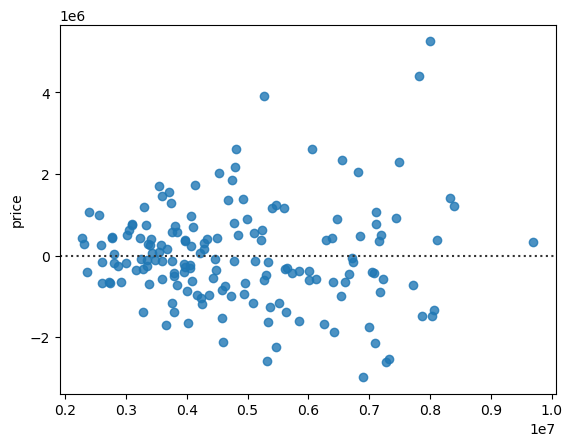

In [54]:
import seaborn as sns
sns.residplot(y=error,x=y_pred,data=df)
plt.show()

In [56]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
r2_score=r2_score(y_test,y_pred)

In [58]:
mse

1523019469501.2913

In [60]:
r2_score

0.6463350878895877

In [62]:
ss_res=sum((y_test.values[i]-y_pred[i])**2 for i in range(len(y_test)))
y_mean=np.mean(y_test.values)
ss_tot=sum((y_test.values[i]-y_mean)**2 for i in range(len(y_test)))
r2=1-(ss_res/ss_tot)
r2

0.6463350878895875

In [64]:
n=len(y_test)
k=1
adjusted_r2=1-((1-r2)*(n-1)/(n-k-1))

In [66]:
adjusted_r2

0.6441519711481651